# PACF: Partial Autocorrelation Function (Funcion de Autocorrelacion Parcial)

Revision: EL ACF (son los $\rho_k$) es muy util por varias razones:

* Nos da una idea de el tipo de "self-repeatibility" (repetibilidad) de una serie de tiempo. Si tiene periodos o no (como las sinusoidales). O absolutamente dada de un deplazamiento se parece a la original (ruido blanco donde el ACF es un "spike").

* Para resolver el problema inverso de Yule-Walker ($\rho_k$).
* Para hallar el orden de una serie MA: Moving Agerage"

entre otros.

Sin embargo el ACF no sirve para hallar el orden de una serie AR(p).
Para esto hay otro concepto que se llama el PACF: Partial Autocorrelation Function. Y lo vemos hoy.

Recordemos la definicion de ACF ($\rho_{k}$). Tambien conocido como
Pearson correlation coefficient ( $| \rho_k |<1$)

$$ \rho_k = \frac{\text{Cov}( X_t, X_{t-k})}{\sqrt{\mathbb{V}[X_t] \mathbb{V}[X_{t-k}]}} = \frac{\gamma_k}{\gamma_0} = \frac{\gamma_k}{\sigma^2} $$

El problema del ACF es que cada coeficente nuevo $X_t$ depende de todos los anteriores, $X_t$ depende de $X_{t-1}, X_{t-2}, \cdots$, eso esta en la misma ecuacion. Si queremos hallar el coeficiente $\rho_k$ debemos hallar la correlacion entre $X_t$ y $X_{t-k}$. Pero las series de tiempo intermedias  $X_{t-1}, X_{t-2}, \cdots, X_{t-k+1}$ se atraviean en el camino. Cuando yo quiero la correlacion entre $X_t$ y $X_{t-k}$ no quiero
interferencia de las que estan en el medio $X_{t-1}, X_{t-2}, \cdots X_{t-k+1}$. Esta interferencia se debe eliminar. Esto tiene consecuencias
importantes. Una de ellas es hallar el orden p de una serie AR(p), a partir de los datos. 



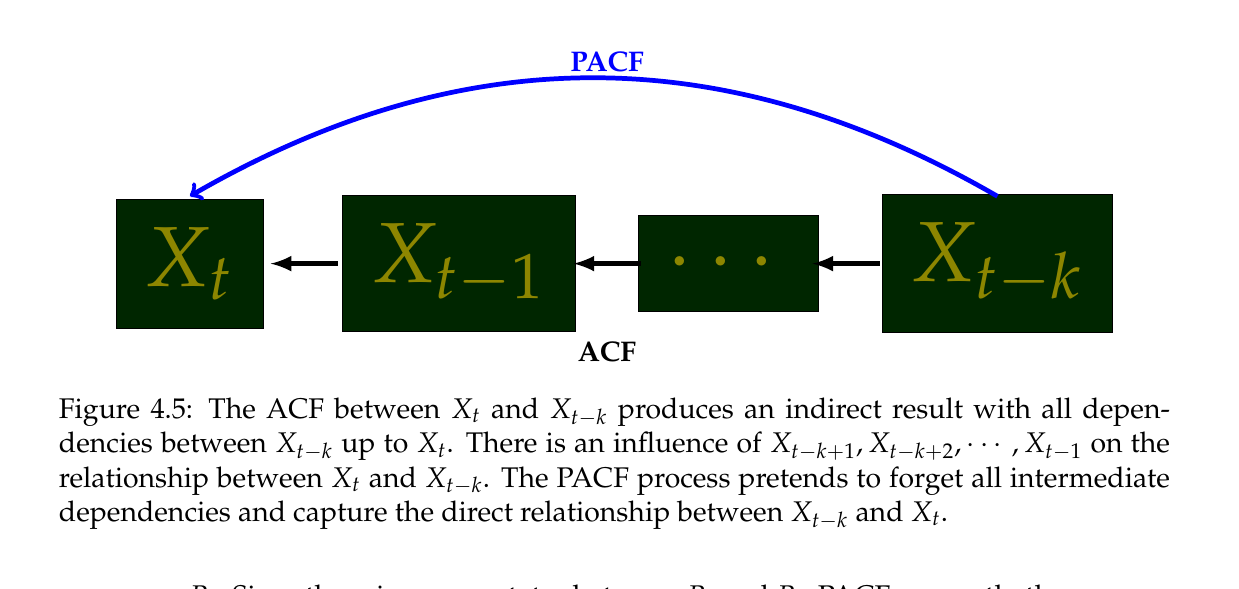

Si podemos encontrar la correlacion (normalizada, Pearson) entre $X_t$ y $X_{t-k}$ luego de remover el "ruido" que generan las intermedias $X_{t-1}, X_{t-2}, \cdots, X_{t-k+1}$, entonces esa se correlacion se le llama Partial Autocorrelacion Funcion PAFC, $P_k$. La pregunta del millo es como se calcula $P_k$. En esta clase vamos a ver 3 formas distintas de calcular $P_k$ en adicion a formas automaticas de Python usando ```statsmodels``` .



* Primer metodo. Usando el concepto mismo. Remover el "ruido" generado por las series intermedias $X_{t-1}, X_{t-2}, \cdots, X_{t-k}$.

    * **caso** $P_0$: El coeficiente 0 es la correlacion entre $X_t$ y $X_t$ removiendo el efecto de los intermedios. Pero no hay intermedios. O sea que es la correlacion (Pearson) entre $X_t$ y $X_t$, es decir

    $$ P_0 = \rho_0 .$$

    * **caso** $P_1$: Aca tampoco hay efecto intermedio, por que entre $X_t$ y $X_{t-1}$ no hay ninguna otra serie. Entonces, tambien $P_1$ es igual a $\rho_1$

    $$ P_1 = \rho_1.$$

    Es decir, que para los dos primeros valores el ACF y el PACF coinciden.

    * **caso** $P_2$: Este es el primer caso interesante.

    Tenemos

    $$ X_t \leftarrow f( X_{t-1}, X_{t-2})$$
    Para calcular $P_2$ necesitamos remover el efecto de $X_{t-1}$.
    La idea es la siguente, tenemos la depenencia en dos direcciones

    $$ X_t \rightarrow X_{t-1} \rightarrow X_{t-2}$$
    $$ X_{t-2} \rightarrow X_{t-2} \rightarrow X_t$$.

        * El primero caso. Debemos remover la interferencia cusado por $X_{t-2}$ entre $X_t, X_{t-2}$. Como se hace esto? se calcula un nuevo $X_t$ de la regresion lineal, es decir se calcula $\hat{X_t}$ de hacer regresion
        entre $X_t, X_{t-1}$ y este debe restar de $X_t$, podemos entonces definir una variable 

        $$ Y_t = X_t - \hat{X_t} $$

        * El segundo (en direccion contraria) se calcula un nuevo $X_{t-2}$ a partir de $X_{t-1}$ y lo llamamos hat$X_{t-2}$, 
          es decir
        $$ Y_{t-2} = X_{t-2}- \hat{X}_{t-2}. $$ 

        De forma que

        $$P_2 = \frac{\text{Cov}[Y_t, Y_{t-2}]}{\sqrt{\mathbb{V}[Y_t] \mathbb{V}[Y_{t-2}]}} =  \frac{\text{Cov}[X_t-\hat{X_t}, X_{t-2} - \hat{X_{t-2}}]}{\sqrt{\mathbb{V}[X_t-\hat{X_t}] \mathbb{V}[X_{t-2} - \hat{X_{t-2}}]}} $$

    * **Caso General**: $P_k$, $k > 2$. Recuerde la figura.

    Tenemos el siguiente esquema de dependencia:
    $$ X_t \rightarrow X_{t-1} \cdots \rightarrow X_{t-k+1} \rightarrow X_{t-k}  $$  y
    $$ X_{t-k} \rightarrow X_{t-k+1} \cdots \rightarrow X_{t-1} \rightarrow X_t$$

    Como hay mas de un intermedio, tenemos que hacer regresion multiple.

    La primer regresion para calcular el nuevo $\hat{X}_t$ es

\begin{eqnarray}
    \hat{X}_t = \alpha_0 + \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + \cdots + \alpha_{k-1} X_{t-k+1}.
\end{eqnarray}

De igual forma, para la segunda cadena

\begin{eqnarray}
    \hat{X}_{t-k} = \beta_0 + \beta_1 X_{t-k+1} + \beta_2 X_{t-k+2} + \cdots + \beta_{k-1} X_{t-1}.
\end{eqnarray}

Una vez calculados estos dos podemos definir:

$$Y_t = X_t - \hat{X}_t  $$ y
$$Y_{t-k} = X_{t-k} - \hat{X}_{t-k}.$$

y de aca:


 $$P_k = \frac{\text{Cov}[Y_t, Y_{t-k}]}{\sqrt{\mathbb{V}[Y_t] \mathbb{V}[Y_{t-k}]}} =  \frac{\text{Cov}[X_t-\hat{X_t}, X_{t-k} - \hat{X_{t-k}}]}{\sqrt{\mathbb{V}[X_t-\hat{X_t}] \mathbb{V}[X_{t-k} - \hat{X_{t-k}}]}} $$


Resulta que hay otras formas de calcular el PACF. En el apendice C de mis notas las muestro. 

La formula es:


\begin{eqnarray}
  P_k  = 
  \frac{ \det
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{2}  \\
      \vdots &  & & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_{k-1} \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & \rho_k \\
    \end{pmatrix}
  }
  {
    \det 
    \begin{pmatrix}
      1 & \rho_1 & \rho_2 & \cdots & \rho_{{k}-2} & \rho_{{k}-1}  \\
      \rho_1 & 1 & \rho_1 & \cdots & \rho_{{k}-3} & \rho_{{k}-2}  \\
      \vdots &  &  & \cdots &  & \vdots \\
      \vdots &  &  & \cdots &  & \vdots \\
      \rho_{{k}-2} & \rho_{{k}-3} & \rho_{{k}-4} & \cdots & 
      1 & \rho_1 \\
      \rho_{{k}-1} & \rho_{{k}-2} & \rho_{{k}-3} & \cdots & 
      \rho_1 & 1 \\
    \end{pmatrix} \, 
  }.
\end{eqnarray}

Revisemos la estructura de este cociente. 

* El denominador es la matriz usada en Yule-Walker. Ya lo conocemos
* El numerador es una variacion del denominador, donde es elimina la columna $k$ y al final se esribe la columna que comienza en $\rho_1$. 

Otra forma de calular el PACF es usando las Yule-Walker equations. 

Vamos a hacer una demostracion, con tres metodos

* Usando regresiones lineales, multples
* Usando la ecuacion de arriba (el cociente de dos determinantes)
* Usando ```statsmodels```.




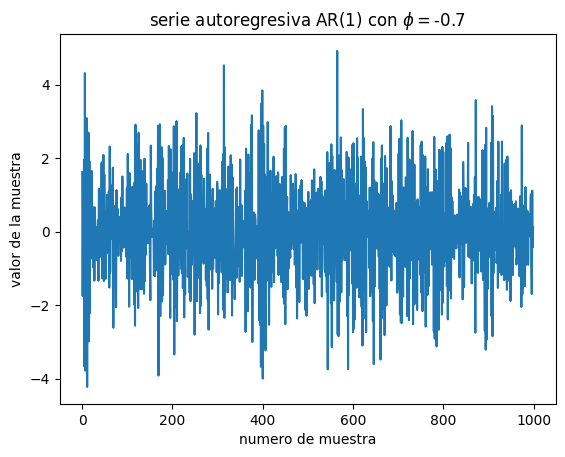

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)
mu, sigma = 0, 1
N=1000

Z = np.random.normal(mu, sigma, N)

# AR(1)
phi=-0.7
X = np.zeros(N)
X[0] = Z[0]

for t in range(1, N):
    X[t] = Z[t] + phi*X[t-1]

# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"serie autoregresiva AR(1) con $\phi=${phi}")
plt.plot(X)


Recuerden el plan de trabajo:

* Encontrar una multiregresion de $X_t$ con respecto a $X_{t-1}, X_{t-2}, \cdots X_{t-k+1}$
* Encontrar una multiregresion de $X_{t-k}$ con respecto a $X_{t-k+1}, X_{t-k+2}, \cdots , X_{t-1}$. 
* Definir $Y_t$ como los **residuales** de la primera
* Definir $Y_{t-k}$ como los *residuales** de la segunda
* Calcular el Pearson correlation coefficient de las dos anteriores.

In [19]:
def rhok(X, k, verbose=0):
    n = X.size
    Y = np.zeros( shape=(n), dtype='float')

    if k==0:
        return 1
    elif k==1:
        # calculamos simplemente rho_1
        Y=X[1:]  # X_{t-1}
        X=X[:-1]  # X_t  (quitando la ulima muestrar, esto generaa un pequeno error)

        correlation = np.corrcoef(X, Y)[0,1]
        return correlation
    else: 
        # incrementamos k en 1 por que tenemos dos extremos X_t, X_{t-k}.
        # si por ejemplo P_2, necesitamos X_t, X_{t-1}, X_{t-2]} necesitamos
        # 3, es decir uno mas
        k = k+1
        Y=np.zeros( shape=(k, n), dtype='float')
        Y[0] = X  # primera columna de Y es X_t
        for i in range(1, k):
            Y[i][:-i]  = X[i:]  # la columna i es X_{t-i}

        # construyamos la columna de unos
        ones = np.ones(shape=(n,1), dtype='float')

        # pegar la columna de unos
        Xmat = np.column_stack((ones, Y[1]))

        # creamos la matriz Xmat de regresion
        for i in range(2, k-1):
            # stack columns
            Xmat = np.column_stack((Xmat, Y[i]))


        XT = Xmat.transpose()  # Xmat.T
        XTX = XT.dot(Xmat)
        XTXInv = np.linalg.inv(XTX)
        b = np.matmul(Xmat.transpose(), Y[0])
        theta = XTXInv.dot(b)

        if verbose : print("theta first pass", theta)

        # calcule los residuales
        Y_t = X - theta[0] - sum(theta[j]*Y[j] for j in range(1, k-1))

        # este es hat{X_t}

        # proceso en el sentido contrario
        # de X_{k-1} ... X_2, X_1, hasta X_0

        # columna de unos
        ones = np.ones(shape=(n,1), dtype='float') # resta eficiencia, ya se calculo
        Xmat = np.column_stack( ( ones, Y[k-2]))

        # poner las columnas, esta vez en "reversa"
        for i in range(k-3, 0, -1):
            Xmat = np.column_stack( (Xmat, Y[i]))


        XT = Xmat.transpose()  # Xmat.T
        XTX = XT.dot(Xmat)
        XTXInv = np.linalg.inv(XTX)
        b = np.matmul(Xmat.transpose(), Y[k-1])
        theta = XTXInv.dot(b)

        if verbose: print("theta second pass", theta)

        # residuales
        Y_tk = Y[k-1] - theta[0] - sum(theta[j]*Y[k-j-1] for  j in range(1, k-1))

        correlation = np.corrcoef(Y_t, Y_tk)[0,1]
        return correlation

In [20]:

def PACF(X, M):
    global verbose
    rho = np.zeros(M)
    for i in range(M):
        rho[i] = rhok(X, i, verbose)
    return rho


<StemContainer object of 3 artists>

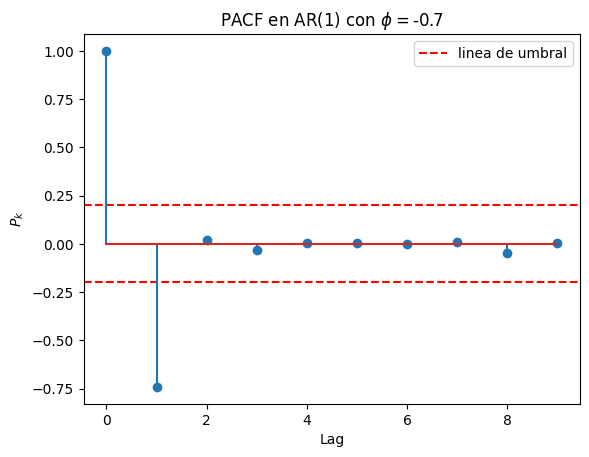

In [24]:
# verificamos comparando con statsmodels
M=10
verbose = 0

rhostattools = np.zeros(M)
rhostattools = sm.tsa.stattools.pacf(X)[0:M]

# nuestra implementacion criolla
rho = PACF(X, M)

plt.axhline(y=0.2, color='r', linestyle='dashed', label='linea de umbral')
plt.axhline(y=-0.2, color='r', linestyle='dashed')

legend=plt.legend(loc='upper right')
plt.title(f"PACF en AR(1) con $\phi=${phi}")
plt.xlabel('Lag')
plt.ylabel('$P_k$')
plt.stem(rho)







<StemContainer object of 3 artists>

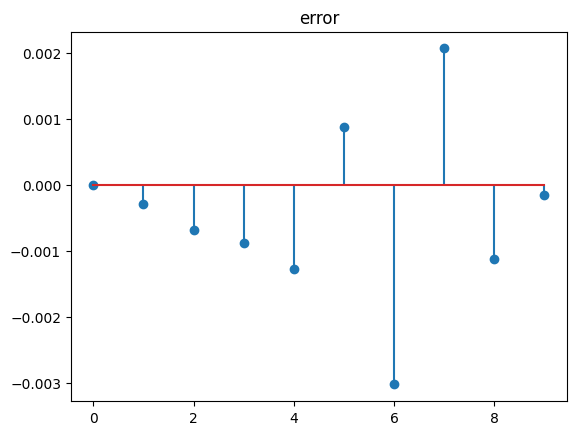

In [26]:
plt.title("error")
plt.stem(rhostattools - rho)